# Drift Example

Simple 1 m drift based on the benchmark in:

3D Space Charge in Bmad
C. E. Mayes, R. D. Ryne,  D. C. Sagan,

https://accelconf.web.cern.ch/ipac2018/papers/thpak085.pdf


In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
# locate the drift template
from impact import Impact, template_dir

ifile = os.path.join(template_dir, 'drift/ImpactT.in')
os.path.exists(ifile)

True

In [3]:
# calculate gamma*beta
mec2 = 0.51099895000e6 # eV
Etot = 10e6 #eV
gamma = Etot/mec2
GB = np.sqrt(gamma**2 -1)
GB


19.54394518727907

# Use Impact's built-in Gaussian particle generator

In [4]:
I = Impact(ifile)
I.header['Np'] = 100000
I.header['Nx'] = 32
I.header['Ny'] = 32
I.header['Nz'] = 32
I.header['Dt'] = 10e-12

================ Impact-T Summary ================    
10000 particles
1 bunch of electrons
total charge: 1000.0000000000001 pC
Distribution type: gauss3
Free space start
Processor domain: 1 x 1 = 1 CPUs
Space charge grid: 32 x 32 x 32
Maximum time steps: 1000000
Reference Frequency: 1000000000.0 Hz
Initial reference time: 0.0 s
Simulation starting from the beginning

Configured to run in: /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpd_vat_6a


In [5]:
I.lattice

[{'description': 'name:2d_to_3d_spacecharge',
  'original': '0 0 0 -5 0 0 -1000.0 /!name:2d_to_3d_spacecharge',
  'type': 'rotationally_symmetric_to_3d',
  's': -1000.0,
  'name': '2d_to_3d_spacecharge'},
 {'description': 'name:drift_1',
  'original': '1.0 0 0 0 1.0 0.15 /!name:drift_1',
  'L': 1.0,
  'type': 'drift',
  'zedge': 1.0,
  'radius': 0.15,
  's': 2.0,
  'name': 'drift_1'},
 {'description': 'name:stop_1',
  'original': '0 0 0 -99 0 0.0 1 /!name:stop_1',
  'type': 'stop',
  's': 1.0,
  'name': 'stop_1'}]

In [6]:
I.run()

Running Impact-T in /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpd_vat_6a
 !-----------------------------------------------------------
 ! IMPACT-T Parallel Beam Dynamics Tracking Code: 2.0 beta version
 ! Copyright of The Regents of the University of California
 !-----------------------------------------------------------
 nblem:            3           3
 pass setting up lattice...
 check randomness:            0  0.79479214134216858     
           0  0.24496010579045746     
 pass generating initial distribution...
 tstop:    1.0000000000000000     
 i,t,<z>:            1   0.0000000000000000        0.0000000000000000     
 zmin,zmax:    1.0586546669431572E-003   1.9304366280240722E-003
 i,t,<z>:            2   9.9999999999999994E-012   1.4971270937927461E-003
 zmin,zmax:    4.0526724931925365E-003   4.9244550300073702E-003
 time:    0.0000000000000000, elapsed: 19.001237154006958Finished.585, elapsed: 18.58314204216003435596
Loaded fort 30 : Fourth root of the fourth moments

In [7]:
I.output['stats'].keys()

dict_keys(['t', 'mean_z', 'moment4_x', 'moment4_y', 'moment4_z', 'mean_y', 'sigma_y', 'norm_emit_y', 'mean_x', 'sigma_x', 'norm_emit_x', 'sigma_z', 'norm_emit_z', 'loadbalance_min_n_particle', 'loadbalance_max_n_particle', 'n_particle', 'moment3_x', 'moment3_y', 'moment3_z', 'mean_gamma', 'mean_beta', 'max_r', 'sigma_gamma', 'max_amplitude_x', 'max_amplitude_y', 'max_amplitude_z', 'moment4_px', 'moment4_py', 'moment4_pz', 'mean_py', 'sigma_py', 'cov_y__py', 'mean_px', 'sigma_px', 'cov_x__px', 'mean_pz', 'sigma_pz', 'cov_z__pz', 'moment3_px', 'moment3_py', 'moment3_pz', 'mean_kinetic_energy', 'max_amplitude_px', 'max_amplitude_py', 'max_amplitude_pz'])

In [8]:
PI = I.particles['initial_particles']
PF = I.particles['final_particles']

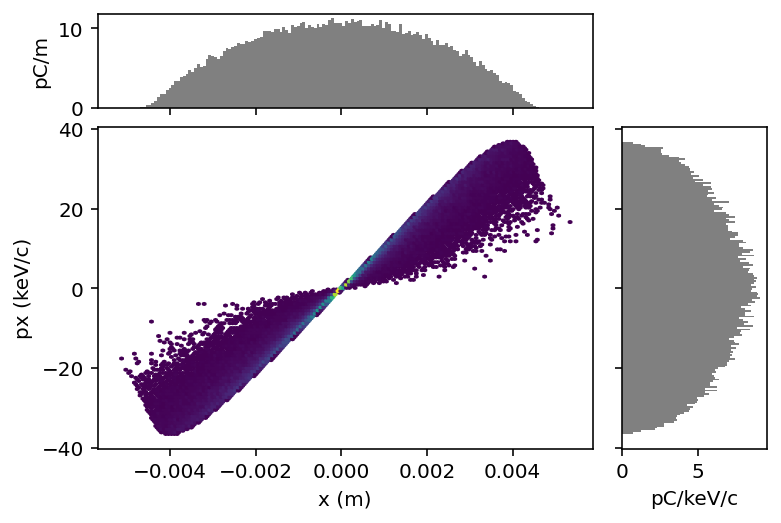

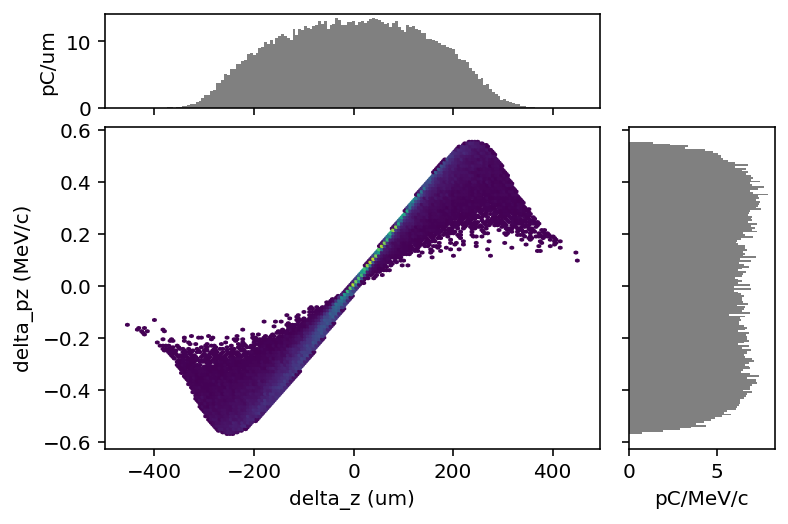

In [9]:
PF.plot('x', 'px')
PF.plot('delta_z', 'delta_pz')

# Make particles in distgen

In [10]:
from distgen import Generator

YAML="""
n_particle: 20000
random_type: hammersley
start:
  tstart:
    units: sec
    value: 0
  type: time
total_charge:
  units: nC
  value: 1
r_dist:
  sigma_xy:
    units: mm
    value: 1.0
  type: radial_gaussian
z_dist:
  avg_z:
    units: mm
    value: 0
  sigma_z:
    units: mm
    value: 0.1
  type: gaussian
  

transforms:
  setPz:
    type: set_avg pz
    avg_pz: 
      value: 10
      units: MeV/c
  
"""
G = Generator(YAML)
G.run()
P = G.particles


In [11]:
I = Impact(ifile, initial_particles=P, verbose=False)
I.run()
PF2 = I.particles['final_particles']

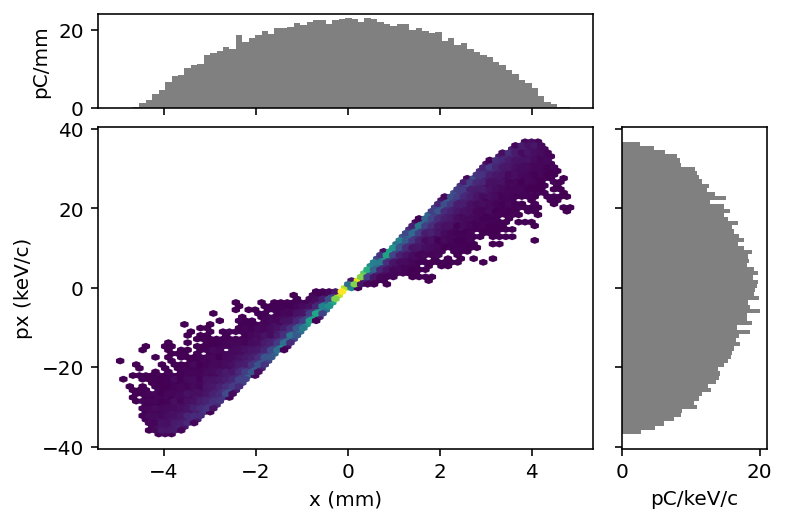

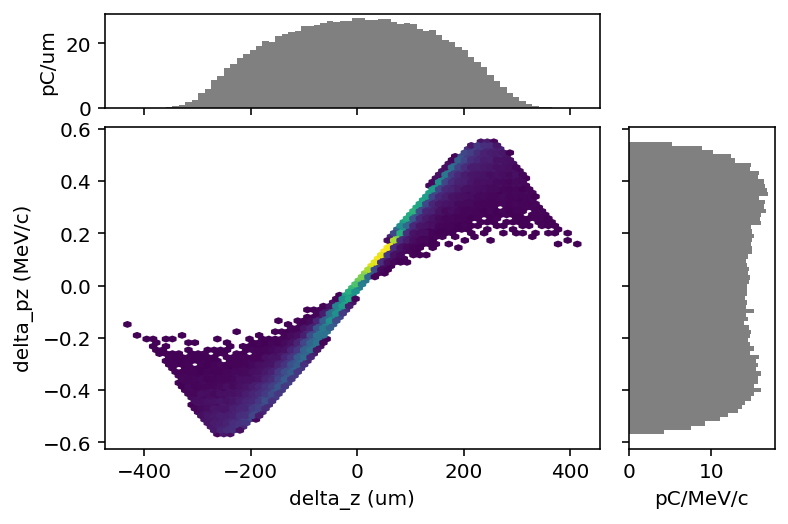

In [12]:
PF2.plot('x', 'px')
PF2.plot('delta_z', 'delta_pz')

# Compare

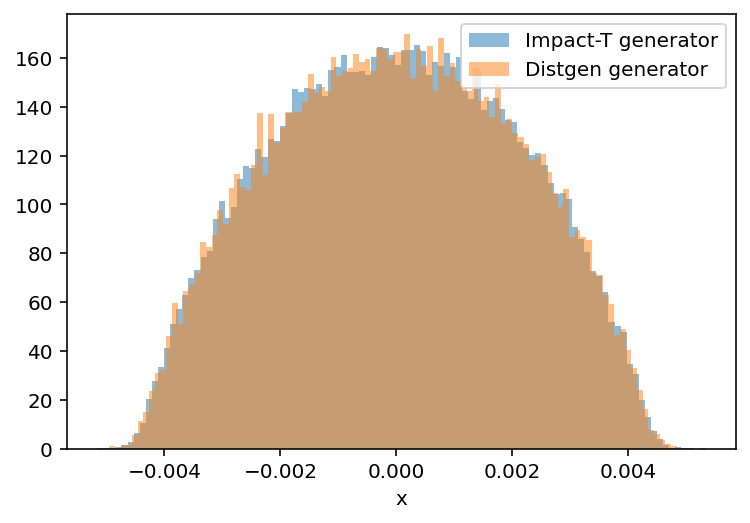

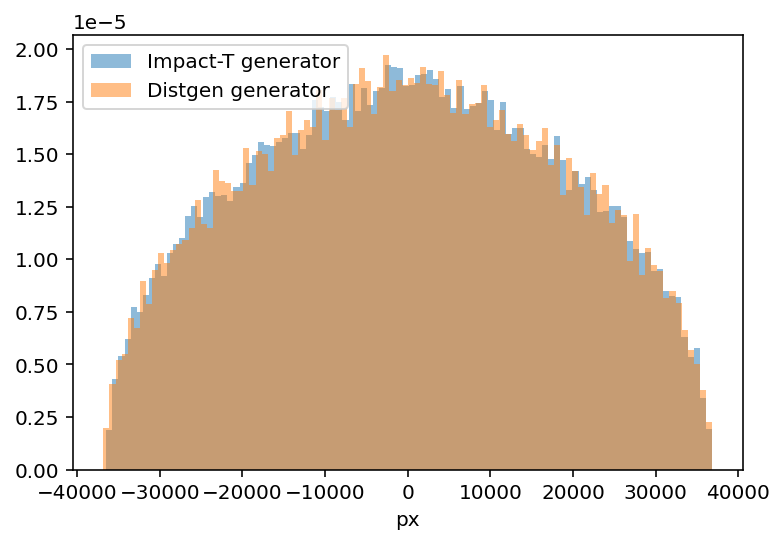

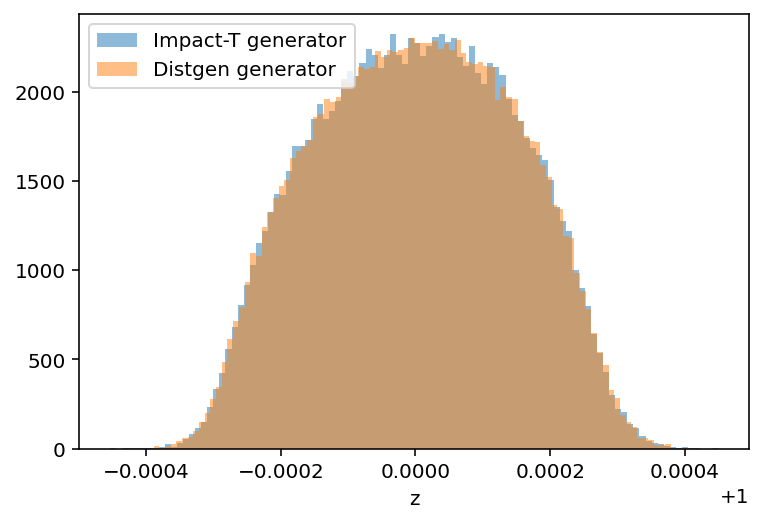

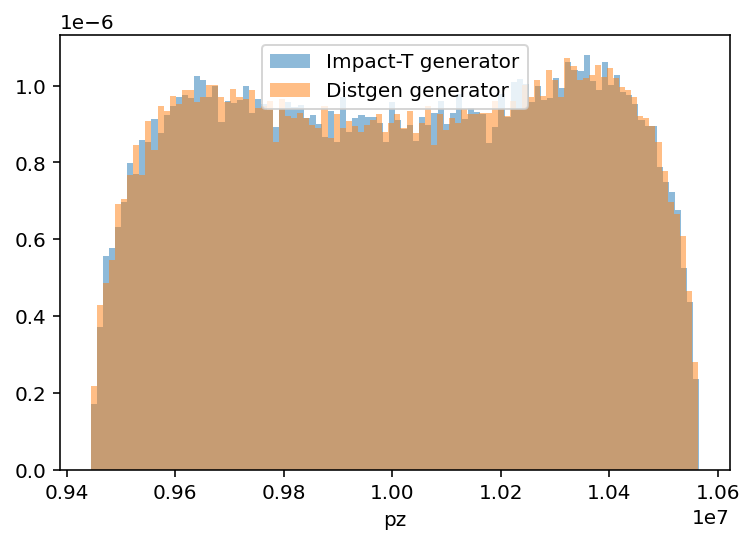

In [13]:
for k in ['x', 'px', 'z', 'pz']:
    plt.hist(PF[k], density=True, bins=100, label='Impact-T generator', alpha=0.5)
    plt.hist(PF2[k], density=True, bins=100, label='Distgen generator', alpha=0.5)
    plt.xlabel(k)
    plt.legend()
    plt.show()